# IMPORTS AND INSTALLS

In [197]:
#!pip3 install smogn

In [198]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import StandardScaler as SS
import re
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import smogn

In [199]:
ss=SS()

# DATA CLEANING AND SYNTHETIC DATA PREP
**df -> synthetic dataframe**<br>
**df_org-> orginal dataframe**

In [200]:
df=pd.read_csv('C:\\Users\\KARAN\\Desktop\\diet project\\train_data_329x19.csv')
df.drop(axis=1,labels='Unnamed: 0',inplace=True)
df.dropna(axis=0,inplace=True)
df.replace(to_replace=2180.0,value=218,inplace=True)
df.reset_index(drop=True,inplace=True)
df['patient_age']=df['patient_age'].astype(int)

df= df.round(2)
x=df.iloc[:,:13]

y=df.iloc[:,18:19]


df.shape


(325, 19)

In [201]:
df.head()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
0,64,0,155.0,60.0,12.73,106.59,0.91,135.0,4.1,83.0,7.75,22.8,24.8,1800.0,246.0,30.0,60.0,3.0,7.0
1,71,1,160.0,65.0,8.30,10.60,0.56,137.0,3.6,83.0,5.91,14.7,15.1,1600.0,220.0,26.6,52.0,2.8,6.0
2,23,0,165.0,74.0,10.60,14.40,0.75,136.0,4.2,83.0,5.80,14.3,13.5,2090.0,400.0,34.8,80.0,3.0,7.0
3,41,0,169.0,97.5,6.58,102.50,2.30,132.0,3.6,83.0,8.65,11.2,10.0,1770.0,243.0,29.5,90.0,1.0,5.0
4,54,0,158.0,75.0,12.76,107.17,0.97,135.0,4.1,83.0,5.14,22.8,24.8,1800.0,247.5,30.0,66.0,3.0,4.0


In [202]:
y.describe()

,NA
count,325.000000
mean,5.673846
std,1.828637
min,0.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,8.000000


array([[<AxesSubplot:title={'center':'NA'}>]], dtype=object)

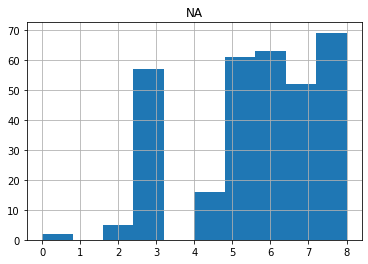

In [203]:
y.hist(bins=10)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_age     325 non-null    int32  
 1   patient_gender  325 non-null    int64  
 2   Ht              325 non-null    float64
 3   Wt              325 non-null    float64
 4   HB              325 non-null    float64
 5   UREA            325 non-null    float64
 6   CR              325 non-null    float64
 7   Na              325 non-null    float64
 8   K               325 non-null    float64
 9   FBS             325 non-null    float64
 10  HBA1C           325 non-null    float64
 11  SGOT            325 non-null    float64
 12  SGPT            325 non-null    float64
 13  calories        325 non-null    float64
 14  cho             325 non-null    float64
 15  Fat             325 non-null    float64
 16  pro             325 non-null    float64
 17  fluids          325 non-null    flo

In [205]:
df.describe()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.00000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,55.652308,0.606154,159.876615,66.876862,13.294492,84.096277,1.038708,134.978462,4.088862,83.846154,6.49280,24.186154,26.158954,1659.036923,229.358462,27.226154,66.273846,29.055692,5.673846
std,18.460478,0.489355,6.428141,9.200941,2.177099,36.993946,0.794877,2.754821,0.350768,10.946321,1.91834,10.665496,12.622462,247.451152,31.447315,3.823283,7.452448,136.173058,1.828637
min,10.000000,0.000000,135.000000,25.900000,6.580000,10.000000,0.530000,124.000000,2.400000,83.000000,4.60000,7.500000,6.700000,150.000000,164.000000,2.500000,43.000000,1.000000,0.000000
25%,43.000000,0.000000,156.000000,63.000000,12.300000,41.400000,0.860000,135.000000,4.100000,83.000000,5.29000,22.800000,24.800000,1520.000000,209.000000,25.000000,62.000000,2.500000,5.000000
50%,58.000000,1.000000,160.000000,68.000000,13.700000,106.040000,0.890000,135.000000,4.100000,83.000000,5.80000,22.800000,24.800000,1610.000000,221.000000,26.800000,67.000000,2.900000,6.000000
75%,70.000000,1.000000,163.500000,71.700000,14.800000,106.970000,0.960000,135.000000,4.100000,83.000000,6.97000,22.800000,24.800000,1820.000000,250.000000,30.000000,70.000000,3.000000,7.000000
max,94.000000,1.000000,180.000000,98.500000,17.300000,200.700000,9.780000,157.000000,6.700000,276.000000,14.60000,133.000000,170.000000,2500.000000,400.000000,42.000000,90.000000,800.000000,8.000000


# TEST TRAIN SPLIT

In [206]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2);

In [207]:
lr=LinearRegression(fit_intercept=True)
en=ElasticNet()
rf=RandomForestRegressor(n_estimators=500,max_depth=3,criterion='absolute_error')
ab=AdaBoostRegressor(n_estimators=100)
gb=GradientBoostingRegressor(n_estimators=100,max_depth=3)
pca=PCA(whiten=True)
lda=LDA()
gpr=GaussianProcessRegressor(kernel=WhiteKernel()+DotProduct())
lgr=LogisticRegression()
svr=SVR(gamma='auto',kernel='rbf')

In [208]:
lr.fit(x_train,y_train.values.ravel())
en.fit(x_train,y_train.values.ravel())
rf.fit(x_train,y_train.values.ravel())
ab.fit(x_train,y_train.values.ravel())
gb.fit(x_train,y_train.values.ravel())
pca.fit(x_train,y_train.values.ravel())
#lda.fit(x_tr,y_tr.values.reshape(-1,1))
gpr.fit(x_train,y_train.values.ravel())
svr.fit(x_train,y_train.values.ravel())

SVR(gamma='auto')

# TRAIN ACC WITH ORGINAL DATASET

In [209]:
print("TRAIN ACC:")
#fh.write("TRAIN ACC - BEFORE FEATURE SELECTION:\n")
print('LR acc: ',lr.score(x_train,y_train.values.ravel()))
print('ElasticNet acc: ',en.score(x_train,y_train.values.ravel()))
print('RandomForest acc: ',rf.score(x_train,y_train.values.ravel()))
print('AdaBoost acc: ',ab.score(x_train,y_train.values.ravel()))
print('GradientBoost acc: ',gb.score(x_train,y_train.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_train,y_train.values.ravel()))+"\n")

print("PCA acc: ",pca.score(x_train,y_train.values.ravel()))
print("GPR acc: ",gpr.score(x_train,y_train.values.ravel()))
print("SVR acc: ",svr.score(x_train,y_train.values.ravel()))


TRAIN ACC:
LR acc:  0.5647139732323687
ElasticNet acc:  0.5523464608788664
RandomForest acc:  0.6710235154870956
AdaBoost acc:  0.7055777567386585
GradientBoost acc:  0.9099438529587995
PCA acc:  -56.10121967078199
GPR acc:  0.5645067577718308
SVR acc:  0.7255683031146932


# TEST ACC AFTER TRAIN WITH ORGINAL DATASET

In [210]:
print("TEST ACC:")
#fh.write("TEST ACC - BEFORE FEATURE SELECTION:\n")

print('LR acc: ',lr.score(x_test,y_test.values.ravel()))
print('ElasticNet acc: ',en.score(x_test,y_test.values.ravel()))
print('RandomForest acc: ',rf.score(x_test,y_test.values.ravel()))
print('AdaBoost acc: ',ab.score(x_test,y_test.values.ravel()))
print('GradientBoost acc: ',gb.score(x_test,y_test.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_test,y_test.values.ravel()))+"\n")
print("PCA acc: ",pca.score(x_test,y_test.values.ravel()))
print("GPR acc: ",gpr.score(x_test,y_test.values.ravel()))
print("SVR acc: ",svr.score(x_test,y_test.values.ravel()))


TEST ACC:
LR acc:  0.5170574748959844
ElasticNet acc:  0.49008872527954706
RandomForest acc:  0.4919363086731551
AdaBoost acc:  0.4347135259402235
GradientBoost acc:  0.4741898571394285
PCA acc:  -64.54315405172594
GPR acc:  0.5163270176212551
SVR acc:  0.18996702824245038


# RMSE WHEN PREDICTING WITH ACTUAL DATA

In [211]:

print('LR acc: ',metrics.mean_squared_error(y_test,lr.predict(x_test))**0.5)
print('ElasticNet acc: ',metrics.mean_squared_error(y_test,en.predict(x_test))**0.5)
print('RandomForest acc: ',metrics.mean_squared_error(y_test,rf.predict(x_test))**0.5)
print('AdaBoost acc: ',metrics.mean_squared_error(y_test,ab.predict(x_test))**0.5)
print('GradientBoost acc: ',metrics.mean_squared_error(y_test,gb.predict(x_test))**0.5)

#fh.write("Gradient Boosting acc: "+str(metrics.mean_squared_error(y_test,lr.predict(x_test))**0.5)+"\n")
#print("PCA acc: ",metrics.mean_squared_error(y_test,pca.predict(x_test)**0.5))
#print("GPR acc: ",metrics.mean_squared_error(y_test,gpr.predict(x_test)**0.5))
print("SVR acc: ",metrics.mean_squared_error(y_test,svr.predict(x_test)**0.5))

LR acc:  1.3622196429469204
ElasticNet acc:  1.3997378988644957
RandomForest acc:  1.3971997324318712
AdaBoost acc:  1.473783571811398
GradientBoost acc:  1.4213920886345137
SVR acc:  16.149062266878854


# CONCLUSION:
- Support Vectors and Random Forest perform better
- training with synthetic data and predicting with the actual data provides better results than just training and predicting with the original dataset 

# synthetic dat


#  FT selection

In [212]:
rfe=RFE(rf,n_features_to_select=None)
rfe.fit(result_x,result_y)

c:\Users\KARAN\AppData\Local\Programs\Orange\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
c:\Users\KARAN\AppData\Local\Programs\Orange\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
c:\Users\KARAN\AppData\Local\Programs\Orange\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
c:\Users\KARAN\AppData\Local\Programs\Orange\lib\site-packages\sklearn\feature_sel

RFE(estimator=RandomForestRegressor(criterion='absolute_error', max_depth=3,
                                    n_estimators=500))

In [213]:
rfe.ranking_
#array([1, 7, 1, 1, 1, 1, 1, 2, 6, 4, 1, 5, 3])
#array([1, 7, 3, 4, 1, 1, 1, 1, 5, 8, 1, 6, 2])
#array([1, 8, 1, 6, 2, 5, 1, 1, 1, 3, 1, 7, 4])

array([1, 5, 1, 2, 1, 4, 3])

In [214]:
result_x

,patient_age,Ht,HB,UREA,CR,Na,HBA1C
0,78,157.6,9.18,121.55,1.78,134.0,8.09
1,57,171.3,14.94,31.27,1.18,137.0,6.03
2,40,154.1,14.66,91.26,2.00,137.0,4.60
3,49,149.1,12.51,108.10,0.83,135.0,4.73
4,42,163.0,13.43,105.33,1.50,139.0,10.25
...,...,...,...,...,...,...,...
286,31,159.0,14.91,105.80,0.94,135.0,5.80
249,77,155.0,12.20,105.77,0.95,135.0,6.68
233,68,168.0,15.14,107.10,0.85,135.0,4.80
255,80,150.0,13.69,107.76,0.91,135.0,9.16


In [215]:
from sdv.tabular import GaussianCopula

In [216]:
model = GaussianCopula(
    field_distributions={
        'weight': 'gamma',
        'UREA': 'gaussian_kde',
        'HB': 'gaussian_kde',
        'K': 'truncated_gaussian',
        'HBA1C': 'gaussian_kde',
        'SGOT': 'gaussian_kde',
        'SGPT': 'gaussian_kde',

    }
)
model.fit(df)
# dropping 

In [217]:
sample = model.sample(500)
sample.head()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
0,78,1,173.2,81.79,17.30,119.46,2.91,137.0,4.00,87.0,5.38,14.3,22.11,1719.0,228.3,24.4,65.0,46.3,5.0
1,63,0,155.0,57.51,10.13,10.00,2.21,137.0,4.18,90.0,4.84,32.9,43.39,1649.0,198.2,25.7,57.0,72.0,6.0
2,46,0,153.8,69.62,8.48,20.08,2.22,134.0,4.27,93.0,4.65,21.1,27.01,1569.0,218.7,26.5,68.0,248.1,6.0
3,49,0,150.5,55.03,13.26,71.01,0.87,132.0,3.96,83.0,5.41,25.3,24.26,1702.0,217.4,25.9,62.0,206.4,5.0
4,87,1,163.8,66.74,15.72,113.00,1.42,134.0,4.37,98.0,6.49,22.0,25.54,1640.0,217.4,26.4,66.0,75.9,5.0


In [218]:
df.describe()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.00000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,55.652308,0.606154,159.876615,66.876862,13.294492,84.096277,1.038708,134.978462,4.088862,83.846154,6.49280,24.186154,26.158954,1659.036923,229.358462,27.226154,66.273846,29.055692,5.673846
std,18.460478,0.489355,6.428141,9.200941,2.177099,36.993946,0.794877,2.754821,0.350768,10.946321,1.91834,10.665496,12.622462,247.451152,31.447315,3.823283,7.452448,136.173058,1.828637
min,10.000000,0.000000,135.000000,25.900000,6.580000,10.000000,0.530000,124.000000,2.400000,83.000000,4.60000,7.500000,6.700000,150.000000,164.000000,2.500000,43.000000,1.000000,0.000000
25%,43.000000,0.000000,156.000000,63.000000,12.300000,41.400000,0.860000,135.000000,4.100000,83.000000,5.29000,22.800000,24.800000,1520.000000,209.000000,25.000000,62.000000,2.500000,5.000000
50%,58.000000,1.000000,160.000000,68.000000,13.700000,106.040000,0.890000,135.000000,4.100000,83.000000,5.80000,22.800000,24.800000,1610.000000,221.000000,26.800000,67.000000,2.900000,6.000000
75%,70.000000,1.000000,163.500000,71.700000,14.800000,106.970000,0.960000,135.000000,4.100000,83.000000,6.97000,22.800000,24.800000,1820.000000,250.000000,30.000000,70.000000,3.000000,7.000000
max,94.000000,1.000000,180.000000,98.500000,17.300000,200.700000,9.780000,157.000000,6.700000,276.000000,14.60000,133.000000,170.000000,2500.000000,400.000000,42.000000,90.000000,800.000000,8.000000


In [219]:
sample.describe()


,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.00000,500.00000,500.000000,500.000000,500.00000,500.000000
mean,55.646000,0.538000,160.259800,66.786260,13.124540,81.19936,1.314160,135.006000,4.06168,91.942000,6.456080,24.549000,26.41958,1661.79200,229.64340,27.199600,66.398000,111.41680,5.634000
std,19.279525,0.499053,6.406651,9.275512,2.271888,39.59133,0.597424,2.775856,0.33851,6.738654,1.980713,11.521679,13.71164,242.20233,31.41728,3.871105,7.273886,84.29265,1.828313
min,10.000000,0.000000,139.700000,38.300000,6.580000,10.00000,0.530000,127.000000,2.94000,83.000000,4.600000,7.500000,6.70000,820.00000,164.50000,17.400000,44.000000,1.20000,0.000000
25%,41.000000,0.000000,155.600000,60.630000,11.950000,37.15500,0.847500,133.000000,3.82750,86.750000,5.157500,20.375000,21.52750,1503.75000,209.67500,24.700000,62.000000,44.20000,5.000000
50%,55.000000,1.000000,160.200000,67.235000,13.520000,99.14000,1.190000,135.000000,4.07000,91.000000,5.730000,22.800000,24.37000,1673.50000,228.00000,27.100000,66.000000,91.90000,6.000000
75%,71.000000,1.000000,164.725000,73.082500,14.810000,110.55250,1.642500,137.000000,4.29000,96.000000,6.765000,25.700000,28.23500,1812.75000,250.32500,29.725000,71.000000,152.40000,7.000000
max,94.000000,1.000000,178.200000,94.620000,17.300000,140.63000,4.060000,142.000000,5.41000,115.000000,14.600000,133.000000,168.31000,2327.00000,350.40000,41.600000,86.000000,441.90000,8.000000


In [220]:
sample_x=sample.iloc[:,:13]
sample_y=sample.iloc[:,18:]

In [221]:
sample_y

,NA
0,5.0
1,6.0
2,6.0
3,5.0
4,5.0
...,...
495,8.0
496,4.0
497,4.0
498,7.0


In [222]:
frames_x = [sample_x,x_train]
frames_y = [sample_y,y_train]
result_x = pd.concat(frames_x)
result_y = pd.concat(frames_y)

In [223]:
result_x.shape

(760, 13)

In [224]:
lr.fit(result_x,result_y.values.ravel())
en.fit(result_x,result_y.values.ravel())
rf.fit(result_x,result_y.values.ravel())
ab.fit(result_x,result_y.values.ravel())
gb.fit(result_x,result_y.values.ravel())
pca.fit(result_x,result_y.values.ravel())
#lda.fit(x_tr,y_tr.values.reshape(-1,1))
gpr.fit(result_x,result_y.values.ravel())
svr.fit(result_x,result_y.values.ravel())

SVR(gamma='auto')

In [225]:
print("TRAIN ACC:")
#fh.write("TRAIN ACC - BEFORE FEATURE SELECTION:\n")
print('LR acc: ',lr.score(result_x,result_y.values.ravel()))
print('ElasticNet acc: ',en.score(result_x,result_y.values.ravel()))
print('RandomForest acc: ',rf.score(result_x,result_y.values.ravel()))
print('AdaBoost acc: ',ab.score(result_x,result_y.values.ravel()))
print('GradientBoost acc: ',gb.score(result_x,result_y.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(result_x,result_y.values.ravel()))+"\n")

print("PCA acc: ",pca.score(result_x,result_y.values.ravel()))
print("GPR acc: ",gpr.score(result_x,result_y.values.ravel()))
print("SVR acc: ",svr.score(result_x,result_y.values.ravel()))


TRAIN ACC:
LR acc:  0.5117713897563446
ElasticNet acc:  0.49096967004956416
RandomForest acc:  0.5287034383294107
AdaBoost acc:  0.5294810373326551
GradientBoost acc:  0.7457625866247217
PCA acc:  -55.96908028802966
GPR acc:  0.5117391833104792
SVR acc:  0.6407847600088676


In [226]:
print("TEST ACC:")
#fh.write("TEST ACC - BEFORE FEATURE SELECTION:\n")

print('LR acc: ',lr.score(x_test,y_test.values.ravel()))
print('ElasticNet acc: ',en.score(x_test,y_test.values.ravel()))
print('RandomForest acc: ',rf.score(x_test,y_test.values.ravel()))
print('AdaBoost acc: ',ab.score(x_test,y_test.values.ravel()))
print('GradientBoost acc: ',gb.score(x_test,y_test.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_test,y_test.values.ravel()))+"\n")
print("PCA acc: ",pca.score(x_test,y_test.values.ravel()))
print("GPR acc: ",gpr.score(x_test,y_test.values.ravel()))
print("SVR acc: ",svr.score(x_test,y_test.values.ravel()))


TEST ACC:
LR acc:  0.5187211413143127
ElasticNet acc:  0.49372188370267023
RandomForest acc:  0.5009331911420476
AdaBoost acc:  0.46610392511891985
GradientBoost acc:  0.5429590767672439
PCA acc:  -61.94889233879894
GPR acc:  0.518222067760232
SVR acc:  0.2020716757399399


AFTER FT SELECTION


In [227]:
#AFTER FT SELECTION
result_x.drop(axis=1,labels=['patient_gender','Wt','K','FBS','SGOT','SGPT'],inplace=True)
x_test.drop(axis=1,labels=['patient_gender','Wt','K','FBS','SGOT','SGPT'],inplace=True)
x_train.drop(axis=1,labels=['patient_gender','Wt','K','FBS','SGOT','SGPT'],inplace=True)



ON NORMAL DATA


In [228]:
lr.fit(x_train,y_train.values.ravel())
en.fit(x_train,y_train.values.ravel())
rf.fit(x_train,y_train.values.ravel())
ab.fit(x_train,y_train.values.ravel())
gb.fit(x_train,y_train.values.ravel())
pca.fit(x_train,y_train.values.ravel())
#lda.fit(x_tr,y_tr.values.reshape(-1,1))
gpr.fit(x_train,y_train.values.ravel())
svr.fit(x_train,y_train.values.ravel())

SVR(gamma='auto')

In [229]:
print("TRAIN ACC:")
#fh.write("TRAIN ACC - BEFORE FEATURE SELECTION:\n")
print('LR acc: ',lr.score(x_train,y_train.values.ravel()))
print('ElasticNet acc: ',en.score(x_train,y_train.values.ravel()))
print('RandomForest acc: ',rf.score(x_train,y_train.values.ravel()))
print('AdaBoost acc: ',ab.score(x_train,y_train.values.ravel()))
print('GradientBoost acc: ',gb.score(x_train,y_train.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_train,y_train.values.ravel()))+"\n")

print("PCA acc: ",pca.score(x_train,y_train.values.ravel()))
print("GPR acc: ",gpr.score(x_train,y_train.values.ravel()))
print("SVR acc: ",svr.score(x_train,y_train.values.ravel()))
print("TEST ACC:")
#fh.write("TEST ACC - BEFORE FEATURE SELECTION:\n")

TRAIN ACC:
LR acc:  0.5610918597212713
ElasticNet acc:  0.5509795712816331
RandomForest acc:  0.6730445385458667
AdaBoost acc:  0.6828885135296339
GradientBoost acc:  0.9148773053936194
PCA acc:  -28.442898589934572
GPR acc:  0.5609328770648101
SVR acc:  0.7413413650017975
TEST ACC:


In [230]:

print('LR acc: ',lr.score(x_test,y_test.values.ravel()))
print('ElasticNet acc: ',en.score(x_test,y_test.values.ravel()))
print('RandomForest acc: ',rf.score(x_test,y_test.values.ravel()))
print('AdaBoost acc: ',ab.score(x_test,y_test.values.ravel()))
print('GradientBoost acc: ',gb.score(x_test,y_test.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_test,y_test.values.ravel()))+"\n")
print("PCA acc: ",pca.score(x_test,y_test.values.ravel()))
print("GPR acc: ",gpr.score(x_test,y_test.values.ravel()))
print("SVR acc: ",svr.score(x_test,y_test.values.ravel()))

LR acc:  0.5113546945384937
ElasticNet acc:  0.4926219739442649
RandomForest acc:  0.5006328554268817
AdaBoost acc:  0.5082645593353643
GradientBoost acc:  0.483882824697099
PCA acc:  -27.89058440828011
GPR acc:  0.5115428684731174
SVR acc:  0.19429065708062565


In [231]:

print('LR acc: ',metrics.mean_squared_error(y_test,lr.predict(x_test))**0.5)
print('ElasticNet acc: ',metrics.mean_squared_error(y_test,en.predict(x_test))**0.5)
print('RandomForest acc: ',metrics.mean_squared_error(y_test,rf.predict(x_test))**0.5)
print('AdaBoost acc: ',metrics.mean_squared_error(y_test,ab.predict(x_test))**0.5)
print('GradientBoost acc: ',metrics.mean_squared_error(y_test,gb.predict(x_test))**0.5)
print("GPR acc: ",metrics.mean_squared_error(y_test,gpr.predict(x_test)**0.5))
print("SVR acc: ",metrics.mean_squared_error(y_test,svr.predict(x_test)**0.5))

LR acc:  1.3702388587060972
ElasticNet acc:  1.3962566077874974
RandomForest acc:  1.3851901563434421
AdaBoost acc:  1.3745646449031343
GradientBoost acc:  1.4082299287674165
GPR acc:  15.415457307926932
SVR acc:  16.16335103830084


on synthetic data

In [232]:
lr.fit(result_x,result_y.values.ravel())
en.fit(result_x,result_y.values.ravel())
rf.fit(result_x,result_y.values.ravel())
ab.fit(result_x,result_y.values.ravel())
gb.fit(result_x,result_y.values.ravel())
pca.fit(result_x,result_y.values.ravel())
#lda.fit(x_tr,y_tr.values.reshape(-1,1))
gpr.fit(result_x,result_y.values.ravel())
svr.fit(result_x,result_y.values.ravel())

SVR(gamma='auto')

In [233]:
print("TRAIN ACC:")
#fh.write("TRAIN ACC - BEFORE FEATURE SELECTION:\n")
print('LR acc: ',lr.score(result_x,result_y.values.ravel()))
print('ElasticNet acc: ',en.score(result_x,result_y.values.ravel()))
print('RandomForest acc: ',rf.score(result_x,result_y.values.ravel()))
print('AdaBoost acc: ',ab.score(result_x,result_y.values.ravel()))
print('GradientBoost acc: ',gb.score(result_x,result_y.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(result_x,result_y.values.ravel()))+"\n")

print("PCA acc: ",pca.score(result_x,result_y.values.ravel()))
print("GPR acc: ",gpr.score(result_x,result_y.values.ravel()))
print("SVR acc: ",svr.score(result_x,result_y.values.ravel()))


TRAIN ACC:
LR acc:  0.5059858608039933
ElasticNet acc:  0.49047440962394884
RandomForest acc:  0.5259904211527868
AdaBoost acc:  0.5302397188490215
GradientBoost acc:  0.7293493312259645
PCA acc:  -28.614413590243117
GPR acc:  0.5059598588216807
SVR acc:  0.6569019042717504


In [234]:
print("TEST ACC:")
#fh.write("TEST ACC - BEFORE FEATURE SELECTION:\n")

print('LR acc: ',lr.score(x_test,y_test.values.ravel()))
print('ElasticNet acc: ',en.score(x_test,y_test.values.ravel()))
print('RandomForest acc: ',rf.score(x_test,y_test.values.ravel()))
print('AdaBoost acc: ',ab.score(x_test,y_test.values.ravel()))
print('GradientBoost acc: ',gb.score(x_test,y_test.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_test,y_test.values.ravel()))+"\n")
print("PCA acc: ",pca.score(x_test,y_test.values.ravel()))
print("GPR acc: ",gpr.score(x_test,y_test.values.ravel()))
print("SVR acc: ",svr.score(x_test,y_test.values.ravel()))


TEST ACC:
LR acc:  0.540286921507483
ElasticNet acc:  0.49416078561770205
RandomForest acc:  0.5059361050880867
AdaBoost acc:  0.4973613598378074
GradientBoost acc:  0.5144747808010465
PCA acc:  -27.951018452797857
GPR acc:  0.5400109163840235
SVR acc:  0.2361059537448711


In [235]:

print('LR acc: ',metrics.mean_squared_error(y_test,lr.predict(x_test))**0.5)
print('ElasticNet acc: ',metrics.mean_squared_error(y_test,en.predict(x_test))**0.5)
print('RandomForest acc: ',metrics.mean_squared_error(y_test,rf.predict(x_test))**0.5)
print('AdaBoost acc: ',metrics.mean_squared_error(y_test,ab.predict(x_test))**0.5)
print('GradientBoost acc: ',metrics.mean_squared_error(y_test,gb.predict(x_test))**0.5)
print("GPR acc: ",metrics.mean_squared_error(y_test,gpr.predict(x_test)**0.5))
print("SVR acc: ",metrics.mean_squared_error(y_test,svr.predict(x_test)**0.5))

LR acc:  1.3290546639260383
ElasticNet acc:  1.3941376674512613
RandomForest acc:  1.377815204757713
AdaBoost acc:  1.3897201356667614
GradientBoost acc:  1.365857245044455
GPR acc:  15.486415353277996
SVR acc:  15.884702084502022


## synthetic data gives less overfitting, slightly higher test accuracy and a lower mean square err